In [19]:
import numpy as np
import matplotlib.pyplot as plt
from Helper import *

In [20]:
#GRAPHS#
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

blue = 'royalblue'
red = 'crimson'
col1 = 'darkmagenta'
col2 = 'goldenrod'
col3 = 'mediumturquoise'
col4 ='forestgreen'

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [21]:
# constants

# 0 - male, 1 - female 
gender = [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, # player 0 - 16
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, # 17 - 32
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, # 33 - 48
         0, 0, 0, 0, 1, 1, 1, 1, 0, 0 ,0 ,0, 0, 0, 0, 0 ] # 49 - 64 

# body, leftUpperArm, RightUpperArm, RightFoot, LeftFoot, LeftHand, RightHand
bodyPartsGroups= [0,1,1,2,2,3,3]
# 0 = right, 1 = hand
hand = [0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1]
gen = [0,1,1,1,0,0,0,0,1,1,1,1,0,1,0,0]
height = [1.7, 1.73, 1.65, 1.72, 1.77, 1.82, 1.81, 1.79, 1.6, 1.7, 1.7, 1.65, 1.8, 1.78, 1.84, 1.85 ]
colours = ["royalblue","crimson","crimson","crimson","royalblue","royalblue","royalblue","royalblue","crimson","crimson","crimson","crimson","royalblue","crimson","royalblue","royalblue"]
armLength = [28,23.5,27,27, 28, 27, 28, 26, 23, 26, 24, 26, 27, 24, 26, 29]
vrLength = [4.94, 3.90, 2.49, 3.39, 5.27, 5.09, 7.19, 4.14, 6.20, 3.00, 4.21, 4.90, 5.45, 2.87, 6.95, 2.70]
realLength = [ a * b / 100 for (a,b) in zip(armLength,vrLength) ]

weightPercentageMale = [0.551, 0.0325, 0.0325, 0.1668, 0.1668, 0.0252, 0.0252]
weightPercentageFemale = [0.532, 0.029, 0.029, 0.1843, 0.1843, 0.0207, 0.0207]

playersTraining = [2, 7, 11, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62]
playersBaseline = [4, 9, 13, 16, 19, 24, 28, 31, 36, 39, 43, 48, 51, 56, 60, 63]
playersOptimal  = [3, 8, 12, 15, 20, 23, 27, 32, 35, 40, 44, 47, 52, 55, 59, 64]

path = "E:\\Andreea\\Master\\Thesis\\Git\\TheOne\\SmartuistWrapper\\tapResultParticipants.csv"
pathH = "C:\\Users\\huber\\OneDrive\\Dokumenty\\thesis-hubert\\unity\\SmartuistWrapper\\tapResultParticipants.csv"

In [22]:
# computes the gain for the player (from effort per body part and throughput)
def getGainPerPlayer(p, results):
    gain = [] 
    batchSize = 10
    nrLessons = 2
    playerResults = results[p]
    for l in range(nrLessons):
        stupidTh = 0 
        sumTh = 0
        bodyParts =[ 0 for i in range(7)]
        for res in playerResults: #results for a repetition  
            if(l == int(res[1])):
                for i in range (7):
                    bodyParts[i] += 1 / float(res[21+i])
                sumTh += float(res[13])
                stupidTh += sumTh
        
        bodyParts = [ x / batchSize for x in bodyParts]
        gainEffort = sum(bodyParts) / len(bodyParts)
        gainTh = stupidTh / batchSize
        gain.append((gainEffort + gainTh) / 2)
    
    return np.average(gain)

# get effort and distance per body parts
def EffortPerBodyPartPerPlayerSummed(p, results, batchSize, limitLessons):
    effortBodyParts = [ 0 for i in range(7)]
    distBodyParts = [ 0 for i in range(7)]
    tmp = results[p]
    counter = 0
    for words in tmp:
        if int(words[1]) < limitLessons:
            for i in range (7):
                effortBodyParts[i] += float(words[21+i])
                distBodyParts[i] += float(words[14+i])

            counter = counter + 1
            if counter == batchSize:
                counter = 0
            if counter == 0:
                for i in range(7):
                    effortBodyParts[i] /= batchSize
                    distBodyParts[i] /= batchSize
    return (effortBodyParts, distBodyParts)

# a list with the results at idx for the given player    
def getResultPerPlayer(p, results, idx, unique ):
    tmp = results[p]
    values = []
    for words in tmp:
        values.append(float(words[idx]))
    if (unique == True):
        values =  [x for i, x in enumerate(values) if i == values.index(x)]
    return values

# sort list1 - use the indexes of the sorted list1 to rearrage list2    
def getCombinedPlot(list1, list2):
    idx   = np.argsort(list1)
    list1 = np.array(list1)[idx]
    list2 = np.array(list2)[idx]  
    return (list1, list2)

def EffortPerBodyPartPerPlayer(p, results):
    bodyParts =[ [0]*1 for i in range(7)]
    distBodyParts = [[0] * 1 for i in range (7)]
    tmp = results[p]
    counter = 0
    for words in tmp:            
        for i in range (7):
            bodyParts[i][bodyParts[i].index(bodyParts[i][-1])] += float(words[21+i])
            distBodyParts[i][distBodyParts[i].index(distBodyParts[i][-1])] += float(words[14+i])
        counter = counter + 1
        if counter == 10:
            counter = 0
        if counter == 0:
            for i in range(7):
                bodyParts[i][bodyParts[i].index(bodyParts[i][-1])] /= 10
                bodyParts[i].append(0)
                distBodyParts[i][distBodyParts[i].index(distBodyParts[i][-1])] /= 10
                distBodyParts[i].append(0)
    return (bodyParts, distBodyParts)

In [5]:
results = readFromFile(pathH, 0)

In [6]:
from scipy.stats import pearsonr, spearmanr, kendalltau

def findCorelation(data1, data2, label=""):
    print(label)
    
    # calculate pearso's correlation
    coef, p = pearsonr(data1, data2) 
    print('Pearson correlation p-value: %.7f' % p)


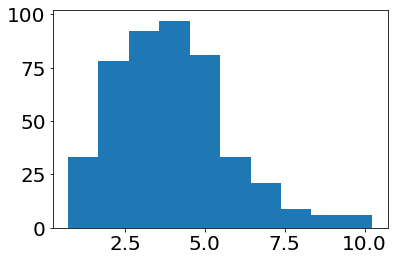

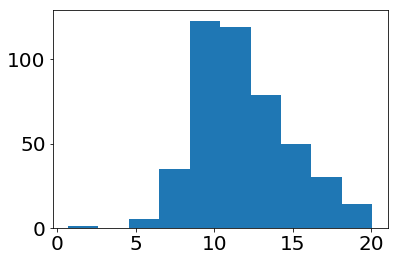

All lengths / Fitness 
Pearson correlation p-value: 0.0759528


In [54]:
# for H2
lengths = []
gainAllParticipants = [] 
for p in playersTraining:
    lengths.append(getResultPerPlayer(p, results, 28, True ))
    gainAllParticipants.append(getResultPerPlayer(p, results, 29, True ))

lengthsCorrect = []
for i in range(len(gainAllParticipants)): 
    l = lengths[i]
    g = gainAllParticipants[i]
    for j in range(len(l)-1, 0, -1):   
        l[j] = l[j-1] * armLength[i]/100
    l[0] = l[0] * armLength[i]/100

    lengthsCorrect.append(l)
    
#remove first column for each participant (gain = -1)
[r.pop(0) for r in lengthsCorrect]
[r.pop(0) for r in gainAllParticipants]


# merge results for all participants
mergedLengths = [item for sublist in lengthsCorrect for item in sublist]
mergedFitness = [item for sublist in gainAllParticipants for item in sublist]

# they are kind of uniformly distributed -> we can use parametric tests
plt.hist(mergedLengths)
plt.show()
plt.hist(mergedFitness)
plt.show()

findCorelation(mergedFitness, mergedLengths, "All lengths / Fitness ")

(16,)
[14, 33, 87, 97, 86, 71, 25, 24, 7, 5, 5, 1]
[0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]
Peak:  1.5


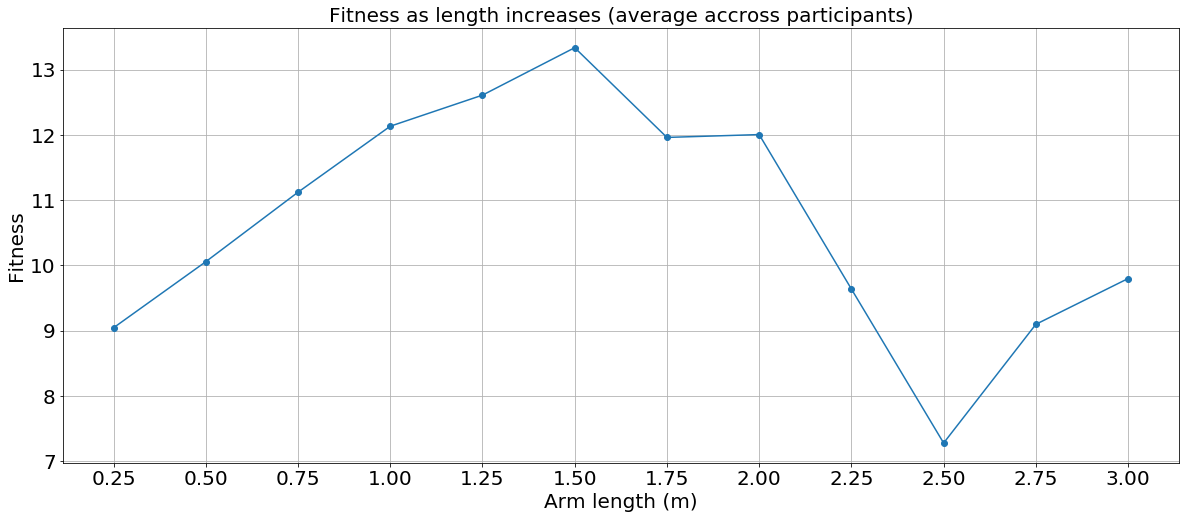

In [50]:
#average Gain across participants
def getAvgFitness(fitness, l): # l is all lenghts for all participants sorted
    step =  0.25
    maxL =  3
    start =  0.25
    i = 0
    binn = 0
    countsPerLenght = []
    averagePerLength = []
    lengths = []
    f = 0
    count = 0
    while(start < maxL and i < len(l)):
        if (l[i] > start):
            binn += 1
            lengths.append(start)
            averagePerLength.append(f) 
            countsPerLenght.append(count)
            start += step
            f = 0
            count = 0
       
        count  += 1
        f += fitness[i] 
        i+=1
    lengths.append(start)
    averagePerLength.append(f) 
    countsPerLenght.append(count)
    print(countsPerLenght)
    for i in range(len(averagePerLength)):
        if(countsPerLenght[i] != 0):
            averagePerLength[i] = averagePerLength[i] / countsPerLenght[i]
    
    return (lengths, averagePerLength)

lSorted, fitnessSorted = getCombinedPlot(mergedLengths, mergedFitness)
LActual, actualPerformance = getAvgFitness(fitnessSorted, lSorted)    
 
print(LActual)

fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(20,8))
axs.plot(LActual, actualPerformance , "-o")
axs.set_title("Fitness as length increases (average accross participants)") 
axs.set_ylabel("Fitness")
axs.set_xlabel("Arm length (m)")
axs.set_xticks(LActual)
axs.grid(True)
plt.savefig("FitnessAsLengthIncreasesLength",bbox_inches='tight', dpi=150) 
print("Peak: ", lengthsA[avgGain.index(max(avgGain))])

In [ ]:
from scipy.interpolate import make_interp_spline, BSpline, pchip

def inter(x,y, points):
    xnew = np.linspace(x.min(),x.max(),points) #300 represents number of points to make between T.min and T.max

    spl = pchip(x, y) #BSpline object
    newY = spl(xnew)
    return(xnew,newY)

mergedLengths, mergedFitness = getCombinedPlot(mergedLengths, mergedFitness)
mergedLengthsI, mergedFitnessI = inter(mergedLengths, mergedFitness, 8)
plt.plot(mergedLengthsI, mergedFitnessI)
plt.xticks(np.arange(0, 11, step=1)) 
plt.title("Fitness as length increases - all values from all participants interpolated") 
plt.xlabel("Arm length multiplier") 
plt.ylabel("Fitness") 
plt.grid(True)  
plt.show()